In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("data.csv", encoding='latin1')

df.head(2)

Reviewer Name            Review Title             Place of Review  \
0       Kamal Suresh            Nice product  Certified Buyer, Chirakkal   
1  Flipkart Customer  Don't waste your money  Certified Buyer, Hyderabad   

   Up Votes  Down Votes     Month  \
0     889.0        64.0  Feb 2021   
1     109.0         6.0  Feb 2021   

                                         Review text  Ratings  
0  Nice product, good quality, but price is now r...        4  
1  They didn't supplied Yonex Mavis 350. Outside ...        1

In [3]:
# Remove spaces and convert to lowercase for column names
df.columns = df.columns.str.replace(' ', '_').str.lower()
df.rename(columns={'month': 'month_year'}, inplace=True)
df.head()

reviewer_name               review_title  \
0            Kamal Suresh               Nice product   
1       Flipkart Customer     Don't waste your money   
2  A. S. Raja Srinivasan   Did not meet expectations   
3     Suresh Narayanasamy                       Fair   
4               ASHIK P A                Over priced   

               place_of_review  up_votes  down_votes month_year  \
0   Certified Buyer, Chirakkal     889.0        64.0   Feb 2021   
1   Certified Buyer, Hyderabad     109.0         6.0   Feb 2021   
2  Certified Buyer, Dharmapuri      42.0         3.0   Apr 2021   
3     Certified Buyer, Chennai      25.0         1.0        NaN   
4                          NaN     147.0        24.0   Apr 2016   

                                         review_text  ratings  
0  Nice product, good quality, but price is now r...        4  
1  They didn't supplied Yonex Mavis 350. Outside ...        1  
2  Worst product. Damaged shuttlecocks packed in ...        1  
3  Quite O. K. , but nowadays  the quality of the...        3  
4  Over pricedJust Ã¢?Â¹620 ..from retailer.I did...        1

In [4]:
df.shape

(8518, 8)

In [5]:
df.loc[0, 'review_text']

'Nice product, good quality, but price is now rising which is a bad sign. 800-850 was an affordable price, especially when we play everyday. So kindly help us out in terms of the price. Thank You.READ MORE'

In [6]:
df.loc[11, 'review_text']

'Best in class....READ MORE'

In [7]:
df.isnull().sum()

reviewer_name       10
review_title        10
place_of_review     50
up_votes            10
down_votes          10
month_year         465
review_text          8
ratings              0
dtype: int64

In [8]:
 df.dropna(inplace=True)

In [9]:
df.isnull().sum()

reviewer_name      0
review_title       0
place_of_review    0
up_votes           0
down_votes         0
month_year         0
review_text        0
ratings            0
dtype: int64

In [10]:
df[df.duplicated()]

Empty DataFrame
Columns: [reviewer_name, review_title, place_of_review, up_votes, down_votes, month_year, review_text, ratings]
Index: []

In [11]:
df.shape

(8013, 8)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8013 entries, 0 to 8507
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   reviewer_name    8013 non-null   object 
 1   review_title     8013 non-null   object 
 2   place_of_review  8013 non-null   object 
 3   up_votes         8013 non-null   float64
 4   down_votes       8013 non-null   float64
 5   month_year       8013 non-null   object 
 6   review_text      8013 non-null   object 
 7   ratings          8013 non-null   int64  
dtypes: float64(2), int64(1), object(5)
memory usage: 563.4+ KB


In [13]:
def map_review(x):
    if x < 3:
        return 'Negative'
    else:
        return 'Positive'

In [14]:
df['ratings_str'] = df['ratings'].apply(lambda x : map_review(x))

In [15]:
# convert label to a numerical variable
df['ratings_num'] = df.ratings_str.map({'Positive':1, 'Negative':0}) # relevant is 1, not-relevant is 0. 

In [16]:
# Convert 'month' column to datetime format
df['month_year'] = pd.to_datetime(df['month_year'], format='%b %Y')

# Extract the year from the 'month' column
df['year'] = df['month_year'].dt.year

df['month'] = df['month_year'].dt.strftime('%B')

In [17]:
df.head()

reviewer_name               review_title  \
0            Kamal Suresh               Nice product   
1       Flipkart Customer     Don't waste your money   
2  A. S. Raja Srinivasan   Did not meet expectations   
5             Baji Sankar      Mind-blowing purchase   
6       Flipkart Customer                  Must buy!   

               place_of_review  up_votes  down_votes month_year  \
0   Certified Buyer, Chirakkal     889.0        64.0 2021-02-01   
1   Certified Buyer, Hyderabad     109.0         6.0 2021-02-01   
2  Certified Buyer, Dharmapuri      42.0         3.0 2021-04-01   
5   Certified Buyer, Hyderabad     173.0        45.0 2018-10-01   
6  Certified Buyer, Doom Dooma     403.0       121.0 2020-01-01   

                                         review_text  ratings ratings_str  \
0  Nice product, good quality, but price is now r...        4    Positive   
1  They didn't supplied Yonex Mavis 350. Outside ...        1    Negative   
2  Worst product. Damaged shuttlecocks packed in ...        1    Negative   
5  Good quality product. Delivered on time.READ MORE        5    Positive   
6  BEST PURCHASE It is a good quality and is more...        5    Positive   

   ratings_num  year     month  
0            1  2021  February  
1            0  2021  February  
2            0  2021     April  
5            1  2018   October  
6            1  2020   January

# Exploratory data analysis (EDA)

In [18]:
df['year'].value_counts()

year
2020    1918
2021    1774
2018    1606
2019    1356
2017     766
2022     561
2016      31
2015       1
Name: count, dtype: int64

In [19]:
df['year'].value_counts(normalize=True)

year
2020    0.239361
2021    0.221390
2018    0.200424
2019    0.169225
2017    0.095595
2022    0.070011
2016    0.003869
2015    0.000125
Name: proportion, dtype: float64

<Axes: xlabel='year', ylabel='count'>

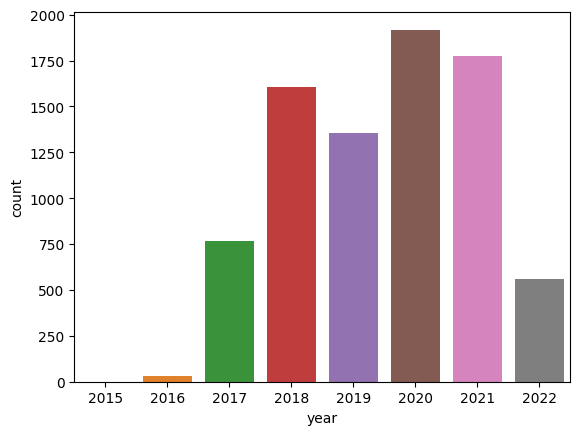

In [20]:
sns.countplot(x='year', data=df)

In [21]:
df['month'].value_counts()

month
October      846
December     767
January      744
November     678
March        666
May          658
February     636
August       628
September    627
June         621
July         620
April        522
Name: count, dtype: int64

In [22]:
df['month'].value_counts(normalize=True)

month
October      0.105578
December     0.095719
January      0.092849
November     0.084613
March        0.083115
May          0.082117
February     0.079371
August       0.078373
September    0.078248
June         0.077499
July         0.077374
April        0.065144
Name: proportion, dtype: float64

<Axes: xlabel='month', ylabel='count'>

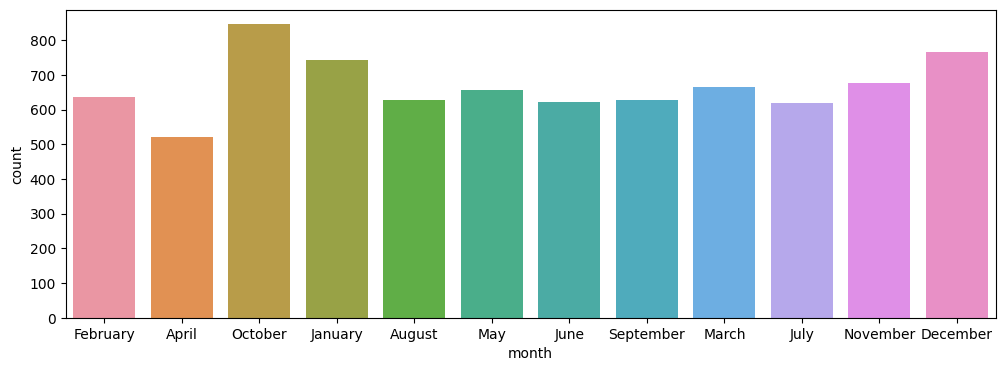

In [23]:
plt.figure(figsize=(12, 4))
sns.countplot(x='month', data=df)

In [24]:
df['ratings'].value_counts()

ratings
5    4803
4    1659
1     688
3     575
2     288
Name: count, dtype: int64

In [25]:
df['ratings'].value_counts(normalize=True)

ratings
5    0.599401
4    0.207039
1    0.085860
3    0.071758
2    0.035942
Name: proportion, dtype: float64

<Axes: xlabel='ratings', ylabel='count'>

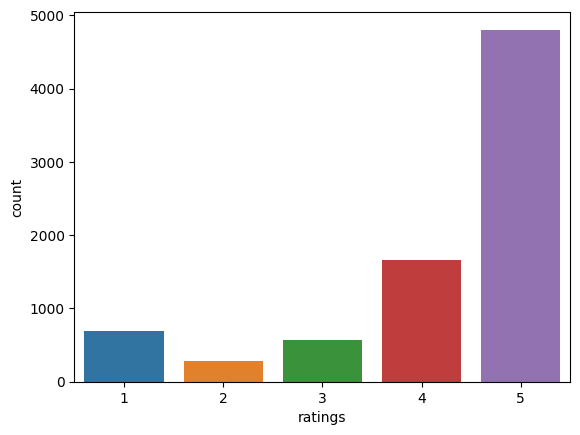

In [26]:
sns.countplot(x='ratings', data=df)

In [27]:
df['ratings_str'].value_counts()

ratings_str
Positive    7037
Negative     976
Name: count, dtype: int64

In [28]:
df['ratings_str'].value_counts(normalize=True)

ratings_str
Positive    0.878198
Negative    0.121802
Name: proportion, dtype: float64

<Axes: xlabel='ratings_str', ylabel='count'>

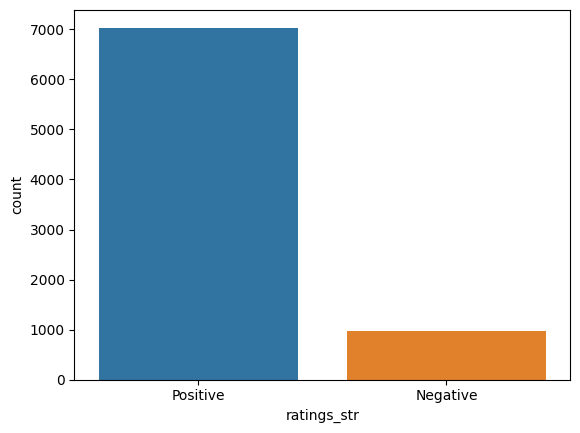

In [29]:
sns.countplot(x='ratings_str', data=df)

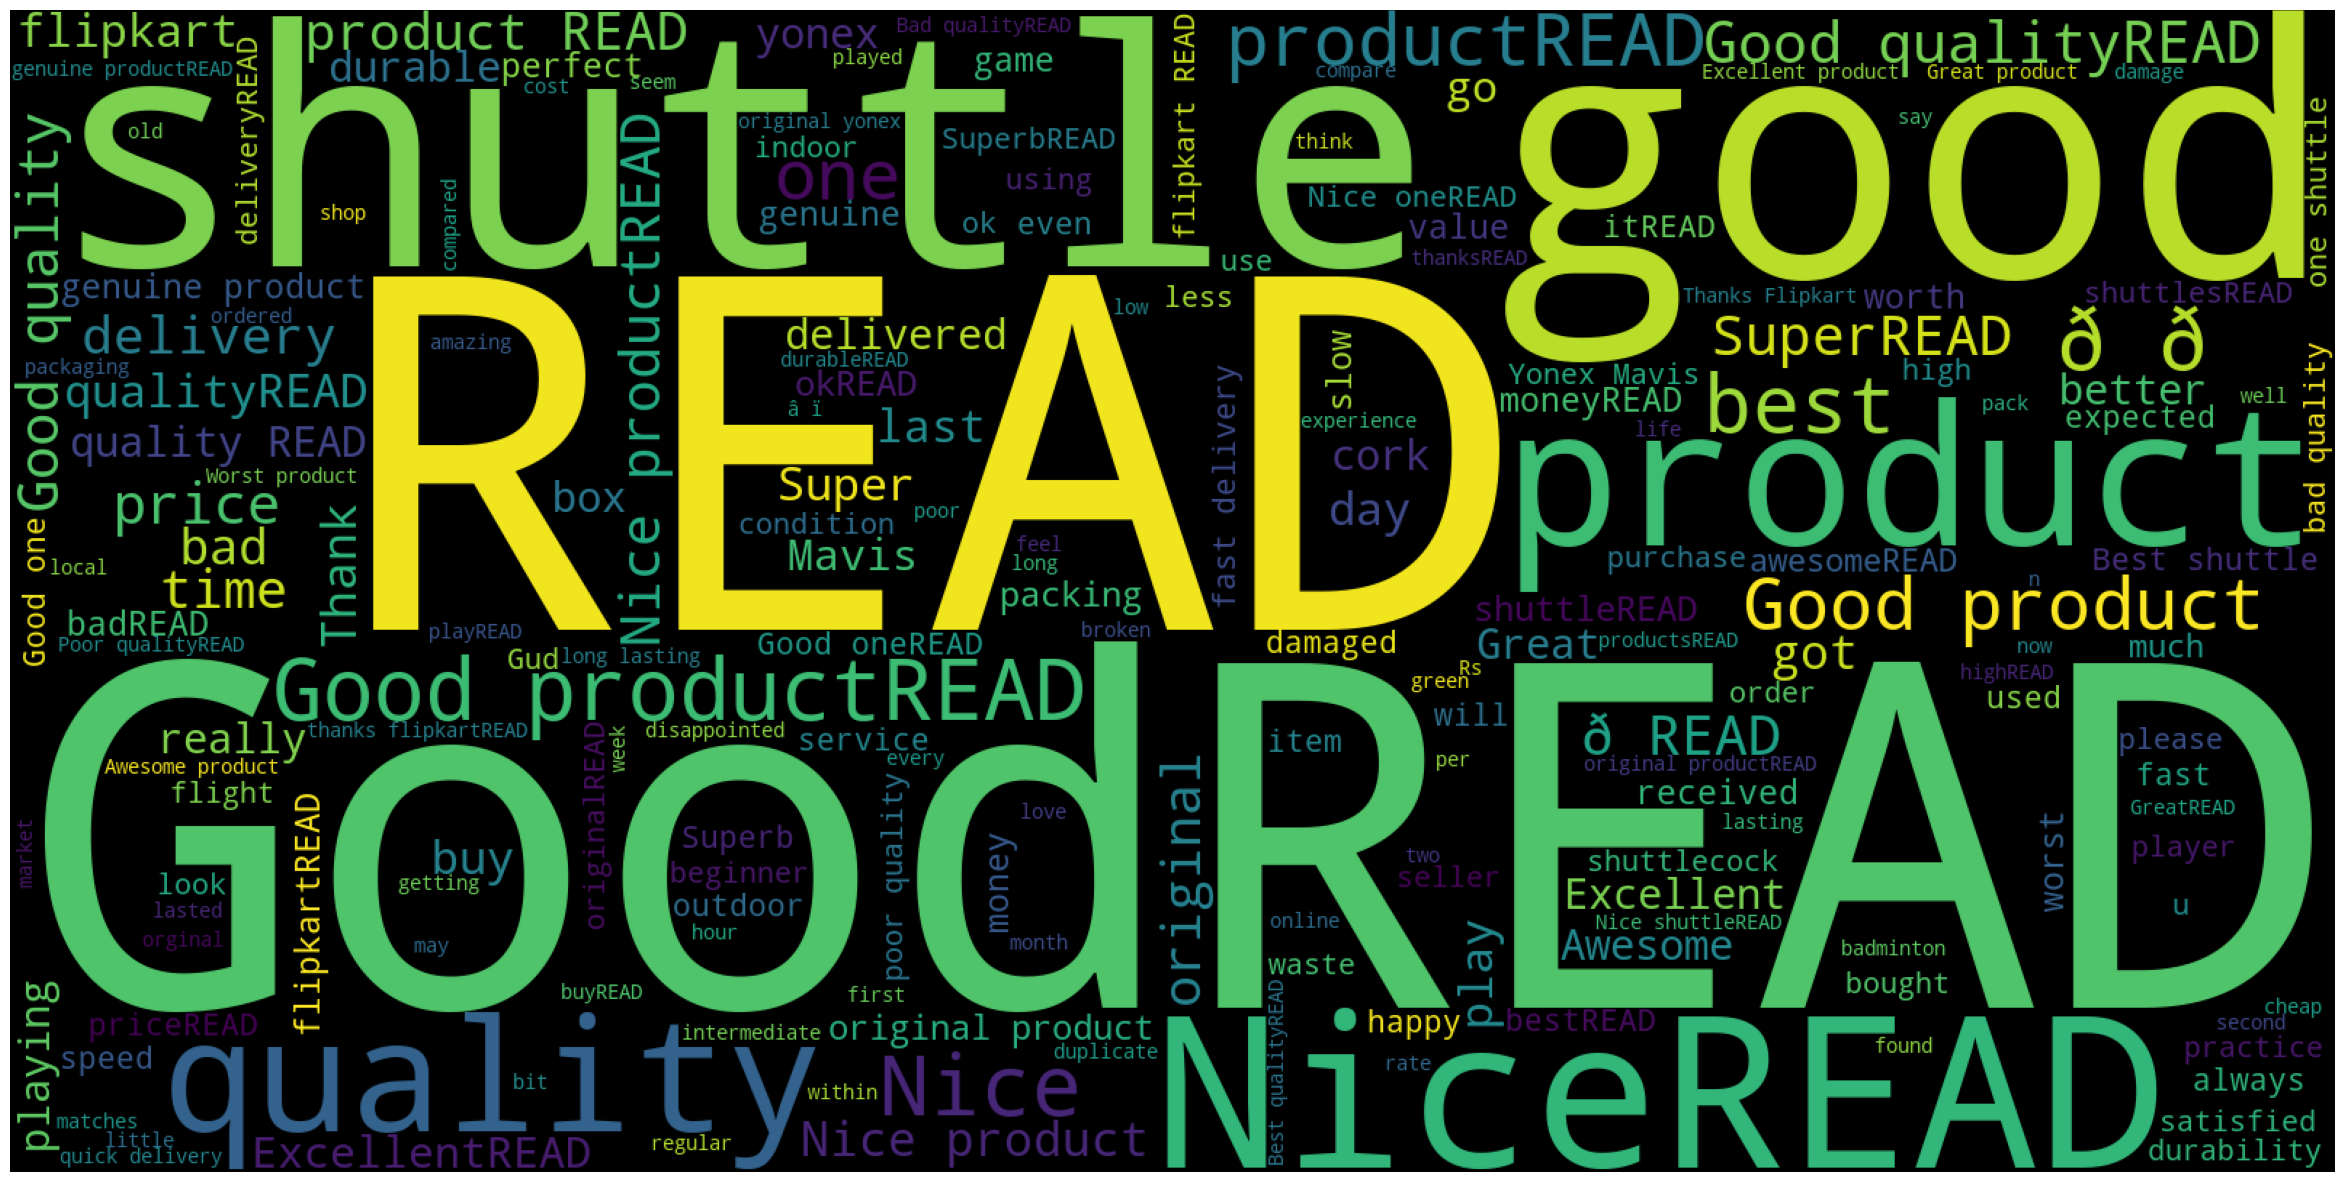

In [30]:
# Visuallizing an overall Word Cloud from the given data

from wordcloud import WordCloud

wc = WordCloud(background_color='black',
               width=1600,
               height=800).generate(' '.join(df['review_text']))

plt.figure(1,figsize=(30,20))
plt.imshow(wc)
plt.axis('off')
plt.show()

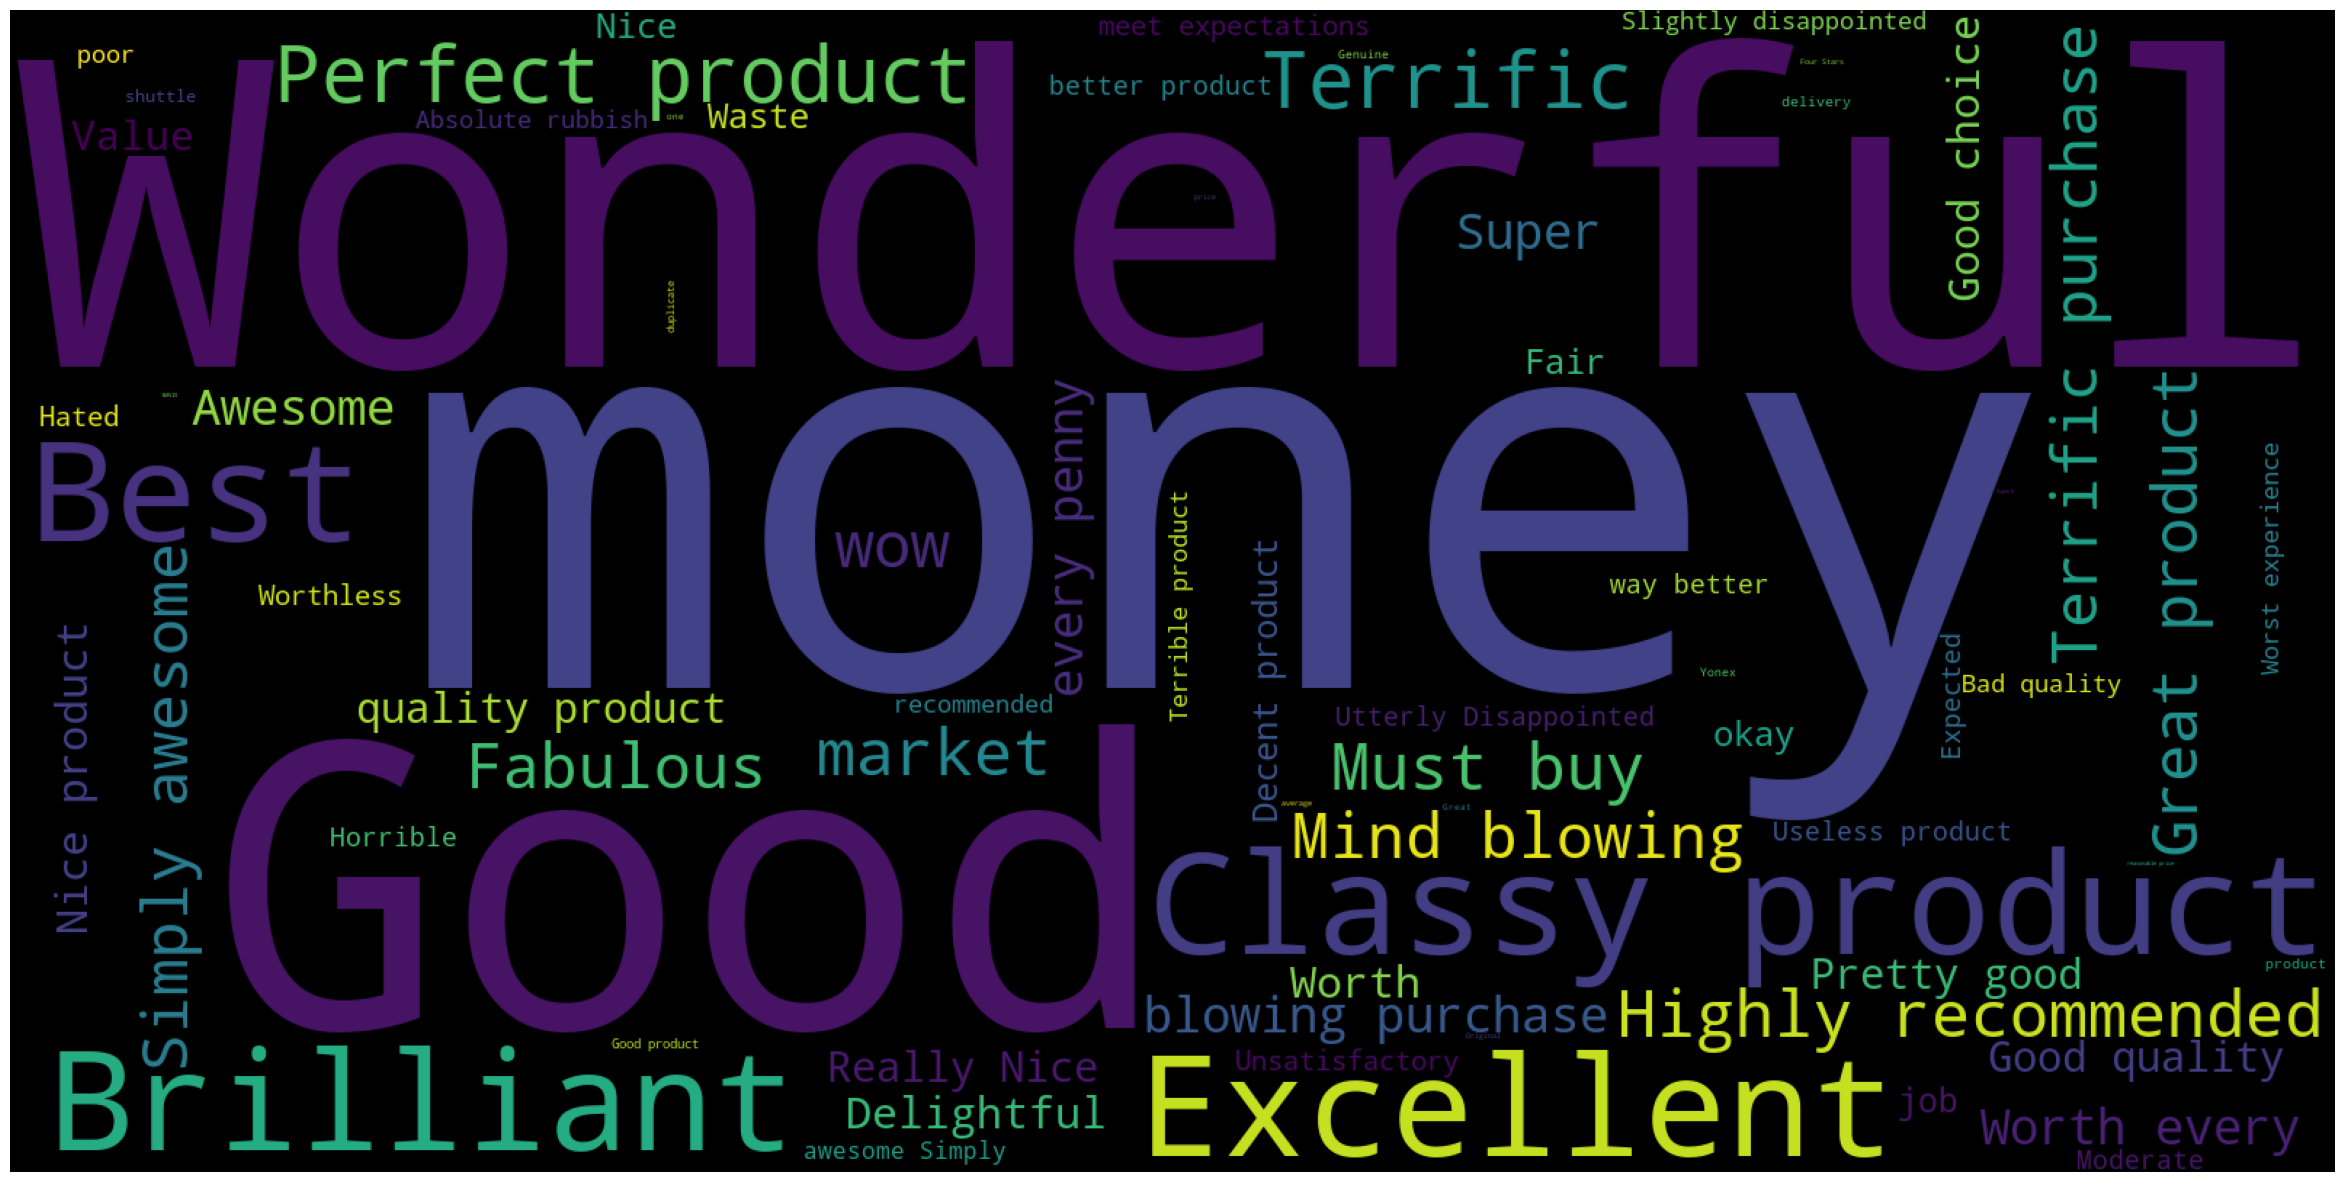

In [31]:
# Visuallizing an overall Word Cloud from the given data

from wordcloud import WordCloud

wc = WordCloud(background_color='black',
               width=1600,
               height=800).generate(' '.join(df['review_title']))

plt.figure(1,figsize=(30,20))
plt.imshow(wc)
plt.axis('off')
plt.show()

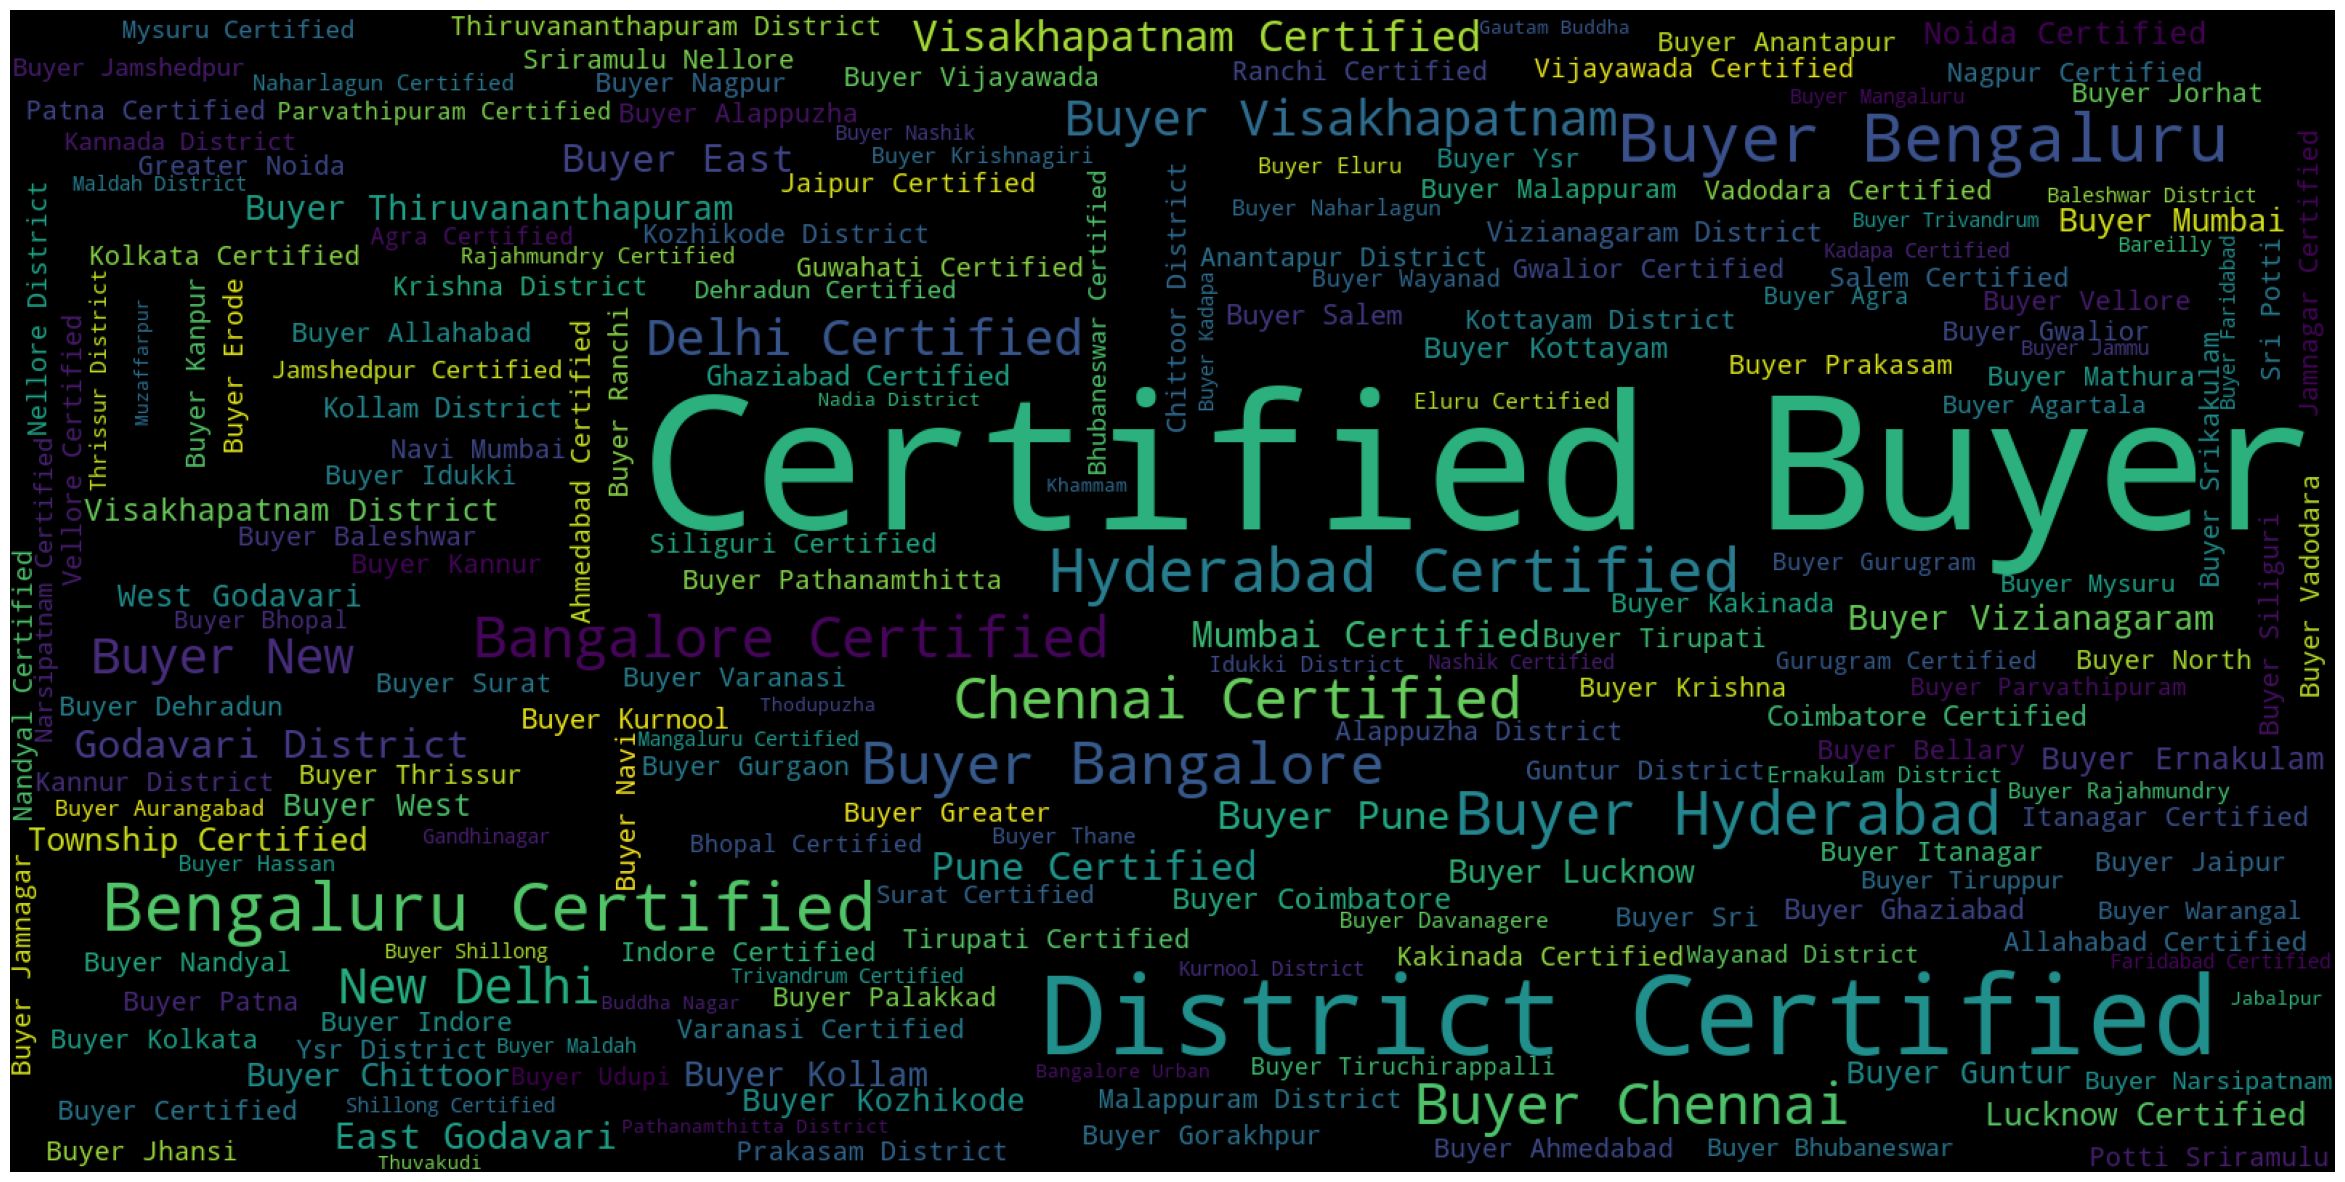

In [32]:
# Visuallizing an overall Word Cloud from the given data

from wordcloud import WordCloud

wc = WordCloud(background_color='black',
               width=1600,
               height=800).generate(' '.join(df['place_of_review']))

plt.figure(1,figsize=(30,20))
plt.imshow(wc)
plt.axis('off')
plt.show()

In [33]:
df['place_of_review'] = df['place_of_review'].str.replace('Certified Buyer, ', '')

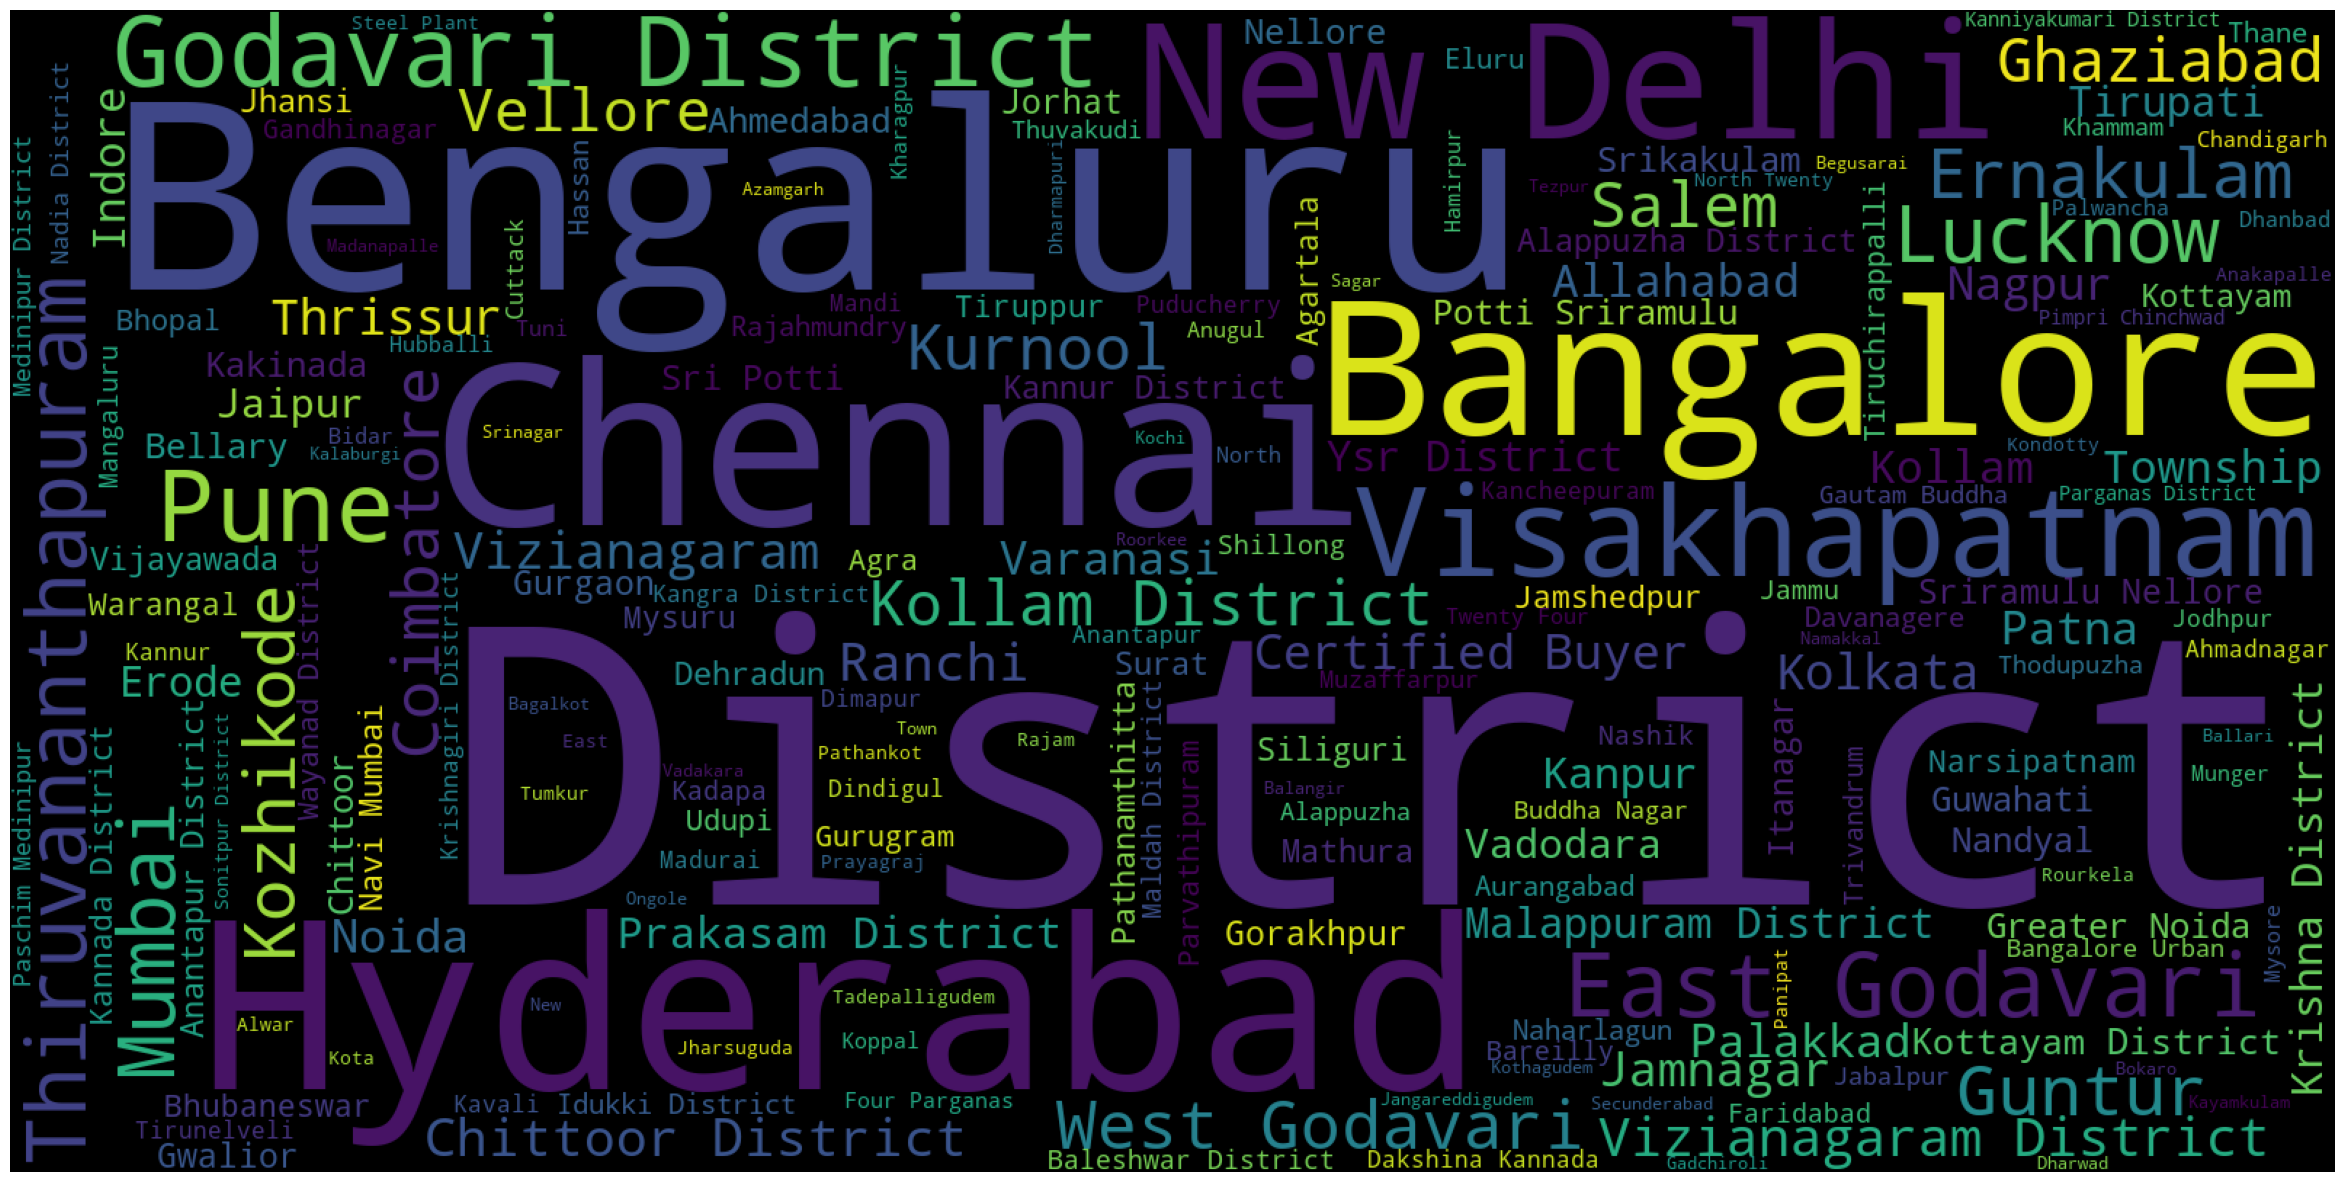

In [34]:
# Visuallizing an overall Word Cloud from the given data

from wordcloud import WordCloud

wc = WordCloud(background_color='black',
               width=1600,
               height=800).generate(' '.join(df['place_of_review']))

plt.figure(1,figsize=(30,20))
plt.imshow(wc)
plt.axis('off')
plt.show()

## we need two columns 

In [35]:
# Let us take only the two columns we need
df = df[["review_text", "ratings_num"]] 
df.shape

(8013, 2)

In [36]:
df.head()

review_text  ratings_num
0  Nice product, good quality, but price is now r...            1
1  They didn't supplied Yonex Mavis 350. Outside ...            0
2  Worst product. Damaged shuttlecocks packed in ...            0
5  Good quality product. Delivered on time.READ MORE            1
6  BEST PURCHASE It is a good quality and is more...            1

In [37]:
df['ratings_num'].value_counts()

ratings_num
1    7037
0     976
Name: count, dtype: int64

In [38]:
df['ratings_num'].value_counts(normalize=True)

ratings_num
1    0.878198
0    0.121802
Name: proportion, dtype: float64

<Axes: xlabel='ratings_num', ylabel='count'>

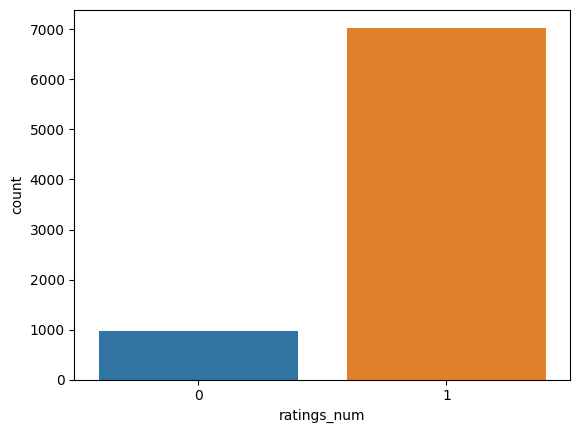

In [39]:
sns.countplot(x='ratings_num', data=df)

# Step 1 - Identify Input and Output

In [40]:
# Step 1: Identify Input and Output

X = df.review_text # the column text contains textual data to extract features from
y = df.ratings_num # this is the column we are learning to predict. 
print(X.shape, y.shape)

(8013,) (8013,)


# Step 2 - Split the Data into Train and Test

In [41]:
# Step 2: Split the data into train and test

from sklearn.model_selection import train_test_split

# split X and y into training and testing sets. 
# By default, it splits 75% training and 25% test
# random_state=1 for reproducibility

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(6009,) (6009,)
(2004,) (2004,)


# Step 3 - Data Preprocessing on train data (X_train)

In [42]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def display_wordcloud(data):
    wc = WordCloud(background_color='black',
               width=1600,
               height=800).generate(' '.join(data))
    plt.figure(1,figsize=(30,20))
    plt.imshow(wc)
    plt.axis('off')
    plt.show()

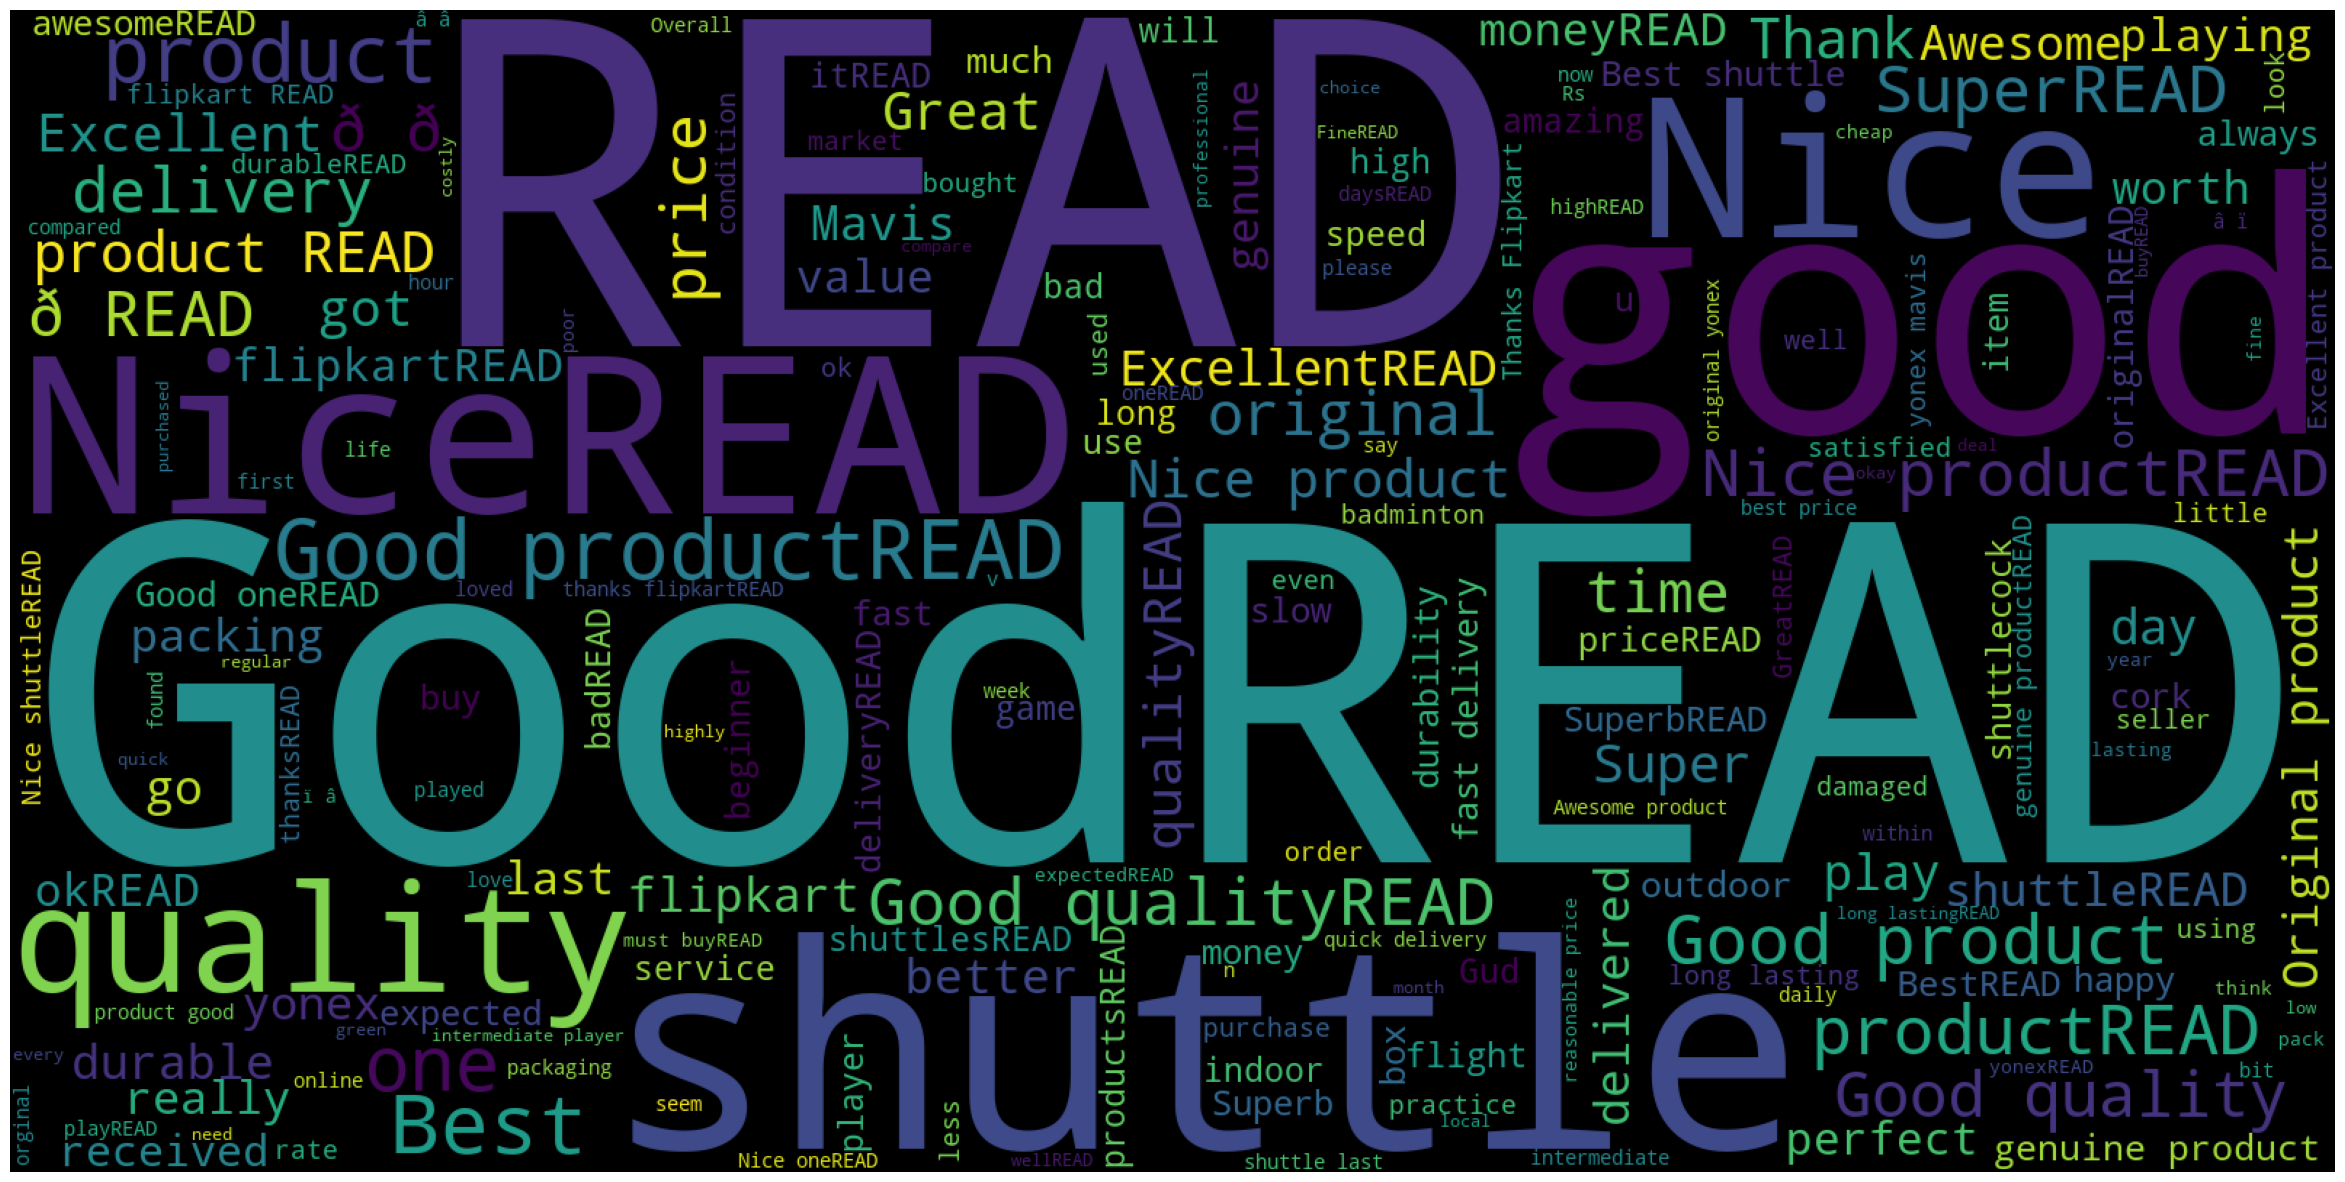

In [43]:
# Display the wordcloud for badminton review data

display_wordcloud(X_train[y_train==1])

In [44]:
# Step 3: Data Preprocessing on train data (X_train)

import string

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Initialize WordNet lemmatizer
lemmatizer = WordNetLemmatizer()

In [45]:
def clean(doc): # doc is a string of text
    # This text contains a lot of <br/> tags.
    doc = doc.replace("</br>", " ")
    
    # Remove punctuation and numbers.
    doc = "".join([char for char in doc if char not in string.punctuation and not char.isdigit()])

    # Converting to lower case
    doc = doc.lower()
    
    # Tokenization
    tokens = nltk.word_tokenize(doc)

    # Lemmatize
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]

    # Stop word removal
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in lemmatized_tokens if word.lower() not in stop_words]
    
    # Join and return
    return " ".join(filtered_tokens)

In [46]:
# import the library using extraction
import nltk
nltk.download('punkt')
import nltk
nltk.download('wordnet')
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\manch\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\manch\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\manch\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [47]:
# import feature extraction methods from sklearn
from sklearn.feature_extraction.text import CountVectorizer

# instantiate a vectorizer
vect = CountVectorizer(preprocessor=clean)

# use it to extract features from training data
%time X_train_dtm = vect.fit_transform(X_train)

print(X_train_dtm.shape)

CPU times: total: 1.27 s
Wall time: 2.1 s
(6009, 3013)


# Step 4 - Data Preprocessing on test data (X_test)

In [48]:
# Step 4: Data Preprocessing on test data (X_test)

# transform testing data (using training data's features)
X_test_dtm = vect.transform(X_test)

print(X_test_dtm.shape)

(2004, 3013)


# Step 5 - Building a Model (i.e. Train the classifier)

In [49]:
# Step 5: Building a Model (i.e. Train the classifier)

# import classifiers from sklearn
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB() # instantiate a Multinomial Naive Bayes model
%time nb.fit(X_train_dtm, y_train) # train the model(timing it with an IPython "magic command")

CPU times: total: 0 ns
Wall time: 1.99 ms


MultinomialNB()

# Step 6 - Evaluating on Train Data

In [50]:
# Step 6: Evaluate on train data

from sklearn import metrics
# make class predictions for X_train_dtm
y_train_pred = nb.predict(X_train_dtm)

metrics.accuracy_score(y_train, y_train_pred)

0.9385921118322517

In [51]:
metrics.confusion_matrix(y_train, y_train_pred)

array([[ 437,  290],
       [  79, 5203]], dtype=int64)

Text(0.5, 23.52222222222222, 'Predicted')

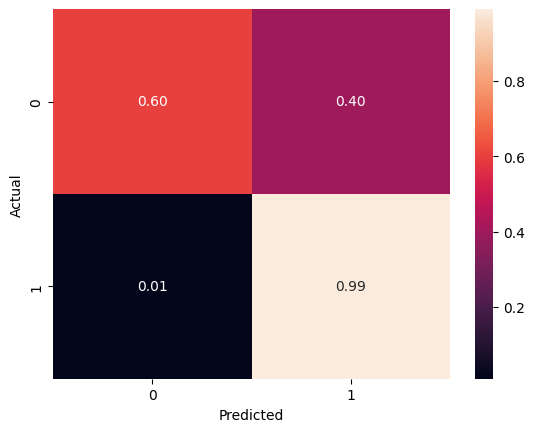

In [52]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

cm = metrics.confusion_matrix(y_train, y_train_pred)
actual = np.sum(cm, axis=1).reshape(-1, 1)
cmn = np.round(cm/actual, 2)

sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=nb.classes_, yticklabels=nb.classes_)
plt.ylabel('Actual')
plt.xlabel('Predicted')

# Step 7 - Evaluate on Test Data

In [53]:
# Step 7: Evaluate on test data

# make class predictions for X_test_dtm
y_test_pred = nb.predict(X_test_dtm)

metrics.accuracy_score(y_test, y_test_pred)

0.9126746506986028

Text(0.5, 23.52222222222222, 'Predicted')

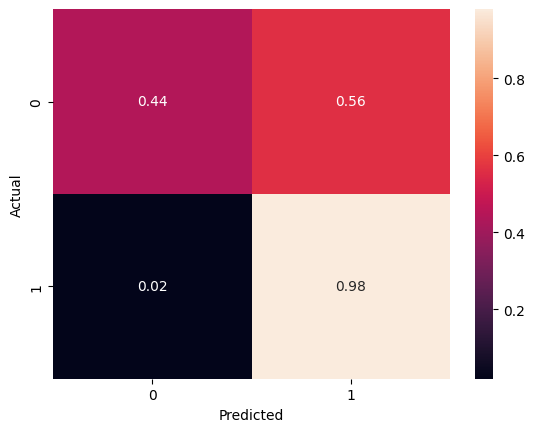

In [54]:
cm = metrics.confusion_matrix(y_test, y_test_pred)
actual = np.sum(cm, axis=1).reshape(-1, 1)
cmn = np.round(cm/actual, 2)

sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=nb.classes_, yticklabels=nb.classes_)
plt.ylabel('Actual')
plt.xlabel('Predicted')

# the metric to F1 Score

In [55]:
# # Understand that accuracy is influenced in the presence of data imbalance
# # Let's change the metric to F1 Score

print("Train Score (F1 Score):", metrics.f1_score(y_train, y_train_pred))

print("Test Score (F1 Score):", metrics.f1_score(y_test, y_test_pred))

Train Score (F1 Score): 0.9657540603248259
Test Score (F1 Score): 0.9515905947441218


# Creating an Optimal Workflow
Pipeline allows you to sequentially apply a list of transformers to preprocess the data and, if desired, conclude the sequence with a final predictor for predictive modeling.

In [56]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report


# Vectorizing the text data
vectorizer = CountVectorizer()
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)

# Naive Bayes: MultinomialNB
from sklearn.naive_bayes import MultinomialNB
clf_nb = MultinomialNB()
clf_nb.fit(X_train_vect, y_train)
%time y_pred_nb = clf_nb.predict(X_test_vect)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print("Naive Bayes Accuracy:", accuracy_nb)
print("Naive Bayes Classification Report:")
print(classification_report(y_test, y_pred_nb))

# SVM: SVC
clf_svm = SVC()
clf_svm.fit(X_train_vect, y_train)
%time y_pred_svm = clf_svm.predict(X_test_vect)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy:", accuracy_svm)
print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))

# KNN: KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
clf_knn = KNeighborsClassifier()
clf_knn.fit(X_train_vect, y_train)
%time y_pred_knn = clf_knn.predict(X_test_vect)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("KNN Accuracy:", accuracy_knn)
print("KNN Classification Report:")
print(classification_report(y_test, y_pred_knn))

# Logistic Regression: LogisticRegression
clf_lr = LogisticRegression()
clf_lr.fit(X_train_vect, y_train)
%time y_pred_lr = clf_lr.predict(X_test_vect)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print("Logistic Regression Accuracy:", accuracy_lr)
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_lr))

# Random Forest: RandomForestClassifier
clf_rf = RandomForestClassifier()
clf_rf.fit(X_train_vect, y_train)
%time y_pred_rf = clf_rf.predict(X_test_vect)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

# Linear Regression: LinearRegression (This is for regression, not classification)
# Discriminant Analysis: LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf_lda = LinearDiscriminantAnalysis()
clf_lda.fit(X_train_vect.toarray(), y_train)  # LDA requires dense input
%time y_pred_lda = clf_lda.predict(X_test_vect.toarray())
accuracy_lda = accuracy_score(y_test, y_pred_lda)
print("Linear Discriminant Analysis Accuracy:", accuracy_lda)
print("Linear Discriminant Analysis Classification Report:")
print(classification_report(y_test, y_pred_lda))

# Neural Networks: MLPClassifier
from sklearn.neural_network import MLPClassifier
clf_nn = MLPClassifier()
clf_nn.fit(X_train_vect, y_train)
%time y_pred_nn = clf_nn.predict(X_test_vect)
accuracy_nn = accuracy_score(y_test, y_pred_nn)
print("Neural Networks Accuracy:", accuracy_nn)
print("Neural Networks Classification Report:")
print(classification_report(y_test, y_pred_nn))

# Gradient Boosting: GradientBoostingClassifier
clf_gb = GradientBoostingClassifier()
clf_gb.fit(X_train_vect, y_train)
%time y_pred_gb = clf_gb.predict(X_test_vect)
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print("Gradient Boosting Accuracy:", accuracy_gb)
print("Gradient Boosting Classification Report:")
print(classification_report(y_test, y_pred_gb))

CPU times: total: 0 ns
Wall time: 0 ns
Naive Bayes Accuracy: 0.906187624750499
Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.41      0.52       249
           1       0.92      0.98      0.95      1755

    accuracy                           0.91      2004
   macro avg       0.82      0.69      0.73      2004
weighted avg       0.90      0.91      0.89      2004

CPU times: total: 125 ms
Wall time: 243 ms
SVM Accuracy: 0.9136726546906188
SVM Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.46      0.57       249
           1       0.93      0.98      0.95      1755

    accuracy                           0.91      2004
   macro avg       0.84      0.72      0.76      2004
weighted avg       0.91      0.91      0.90      2004

CPU times: total: 188 ms
Wall time: 305 ms
KNN Accuracy: 0.9126746506986028
KNN Classification Report:
              precision   

# Implementing Memoization to further improve the runtime

In [57]:
# Improving the efficiency by applying cleaning the text data before hand

%time X_train_clean = X_train.apply(lambda doc: clean(doc))

CPU times: total: 609 ms
Wall time: 1.14 s


In [58]:
%time X_test_clean = X_test.apply(lambda doc: clean(doc))

CPU times: total: 188 ms
Wall time: 382 ms


# Caching to optimize the runtime

# Putting it all together: Implementing various Algorithms to find the Best Model

In [59]:
import joblib
from joblib import Memory

import os

In [60]:
import warnings

warnings.filterwarnings('ignore')

In [61]:
import mlflow

mlflow.set_experiment("flipkart_product_review")

2024/03/22 16:11:37 INFO mlflow.tracking.fluent: Experiment with name 'flipkart_product_review' does not exist. Creating a new experiment.


<Experiment: artifact_location='file:///C:/z1/sentimental_analysis/ml_inf/webapp/mlruns/701798612887496525', creation_time=1711104097689, experiment_id='701798612887496525', last_update_time=1711104097689, lifecycle_stage='active', name='flipkart_product_review', tags={}>

In [62]:
from sklearn.pipeline import Pipeline

from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.ensemble import  AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import GridSearchCV

# Define a memory object to cache intermediate results
cachedir = '.cache'
memory = Memory(location=cachedir, verbose=0)

In [63]:

pipelines = {
    'naive_bayes': Pipeline([
        ('vectorization', CountVectorizer()),
        ('classifier', MultinomialNB())
    ]),
    'decision_tree': Pipeline([
        ('vectorization', CountVectorizer()),
        ('classifier', DecisionTreeClassifier())
    ]),
    'random_forest': Pipeline([
        ('vectorization', CountVectorizer()),
        ('classifier', RandomForestClassifier())
    ]),
    'gradient_boosting': Pipeline([
        ('vectorization', CountVectorizer()),
        ('classifier', GradientBoostingClassifier())
    ]),
    'svm': Pipeline([
        ('vectorization', CountVectorizer()),
        ('classifier', SVC())
    ]),
    'logistic_regression': Pipeline([
        ('vectorization', CountVectorizer()),
        ('classifier', LogisticRegression())
    ]),
    'knn': Pipeline([
        ('vectorization', CountVectorizer()),
        ('classifier', KNeighborsClassifier())
    ]),
    'ada_boost': Pipeline([
        ('vectorization', CountVectorizer()),
        ('classifier', AdaBoostClassifier())
    ])
}

param_grids = {
    'naive_bayes': {
        'vectorization__max_features': [1000, 1500, 2000, 5000],
        'classifier__alpha': [1, 10]
    },
    'decision_tree': {
        'vectorization__max_features': [1000, 1500, 2000, 5000],
        'classifier__max_depth': [None, 5, 10]
    },
    'random_forest': {
        'vectorization__max_features': [1000, 1500, 2000, 5000],
        'classifier__n_estimators': [50, 100, 200],
        'classifier__max_depth': [None, 5, 10]
    },
    'gradient_boosting': {
        'vectorization__max_features': [1000, 1500, 2000, 5000],
        'classifier__n_estimators': [50, 100, 200],
        'classifier__learning_rate': [0.1, 0.01]
    },
    'svm': {
        'vectorization__max_features': [1000, 1500, 2000, 5000],
        'classifier__C': [0.1, 1, 10],
        'classifier__kernel': ['rbf', 'linear']
    },
    'logistic_regression': {
        'vectorization__max_features': [1000, 1500, 2000, 5000],
        'classifier__C': [0.1, 1, 10],
        'classifier__penalty': ['l1', 'l2']
    },
    'knn': {
        'vectorization__max_features': [1000, 1500, 2000, 5000],
        'classifier__n_neighbors': [3, 5, 7]
    },
    'ada_boost': {
        'vectorization__max_features': [1000, 1500, 2000, 5000],
        'classifier__n_estimators': [50, 100, 200],
        'classifier__learning_rate': [0.1, 0.01]
    }
}



In [64]:
best_models = {}

for algo in pipelines.keys():
    print("*" * 10, algo, "*" * 10)
    grid_search = GridSearchCV(estimator=pipelines[algo],
                               param_grid=param_grids[algo],
                               cv=5,
                               scoring='f1_micro',
                               return_train_score=True,
                               verbose=1
                              )

    mlflow.sklearn.autolog(max_tuning_runs=None)
    
    with mlflow.start_run() as run:
        %time grid_search.fit(X_train, y_train)

    best_models[algo] = grid_search.best_estimator_

    print('Score on Test Data: ', grid_search.score(X_test, y_test))

********** naive_bayes **********


2024/03/22 16:11:38 WARNING mlflow.utils.git_utils: Failed to import Git (the Git executable is probably not on your PATH), so Git SHA is not available. Error: Failed to initialize: Bad git executable.
The git executable must be specified in one of the following ways:
    - be included in your $PATH
    - be set via $GIT_PYTHON_GIT_EXECUTABLE
    - explicitly set via git.refresh()

All git commands will error until this is rectified.

This initial message can be silenced or aggravated in the future by setting the
$GIT_PYTHON_REFRESH environment variable. Use one of the following values:
    - quiet|q|silence|s|silent|none|n|0: for no message or exception
    - warn|w|warning|log|l|1: for a warning message (logged at level CRITICAL, displayed by default)
    - error|e|exception|raise|r|2: for a raised exception

Example:
    export GIT_PYTHON_REFRESH=quiet

2024/03/22 16:11:38 WARNING mlflow.sklearn: Unrecognized dataset type <class 'pandas.core.series.Series'>. Dataset logging skipped.

Fitting 5 folds for each of 8 candidates, totalling 40 fits


2024/03/22 16:11:51 WARNING mlflow.sklearn: Unrecognized dataset type <class 'pandas.core.series.Series'>. Dataset logging skipped.


CPU times: total: 2.94 s
Wall time: 13.2 s
Score on Test Data:  0.9006986027944112
********** decision_tree **********
Fitting 5 folds for each of 12 candidates, totalling 60 fits


2024/03/22 16:12:06 WARNING mlflow.sklearn: Unrecognized dataset type <class 'pandas.core.series.Series'>. Dataset logging skipped.


CPU times: total: 6.28 s
Wall time: 15.1 s
Score on Test Data:  0.9201596806387226
********** random_forest **********
Fitting 5 folds for each of 36 candidates, totalling 180 fits
CPU times: total: 2min 59s
Wall time: 4min 50s
Score on Test Data:  0.9266467065868264
********** gradient_boosting **********


2024/03/22 16:16:57 WARNING mlflow.sklearn: Unrecognized dataset type <class 'pandas.core.series.Series'>. Dataset logging skipped.


Fitting 5 folds for each of 24 candidates, totalling 120 fits


2024/03/22 16:19:03 WARNING mlflow.sklearn: Unrecognized dataset type <class 'pandas.core.series.Series'>. Dataset logging skipped.


CPU times: total: 1min 16s
Wall time: 2min 6s
Score on Test Data:  0.9236526946107785
********** svm **********
Fitting 5 folds for each of 24 candidates, totalling 120 fits
CPU times: total: 1min 21s
Wall time: 2min 8s
Score on Test Data:  0.9186626746506986
********** logistic_regression **********


2024/03/22 16:21:12 WARNING mlflow.sklearn: Unrecognized dataset type <class 'pandas.core.series.Series'>. Dataset logging skipped.


Fitting 5 folds for each of 24 candidates, totalling 120 fits


2024/03/22 16:21:25 WARNING mlflow.sklearn: Unrecognized dataset type <class 'pandas.core.series.Series'>. Dataset logging skipped.


CPU times: total: 6.34 s
Wall time: 13 s
Score on Test Data:  0.9136726546906188
********** knn **********
Fitting 5 folds for each of 12 candidates, totalling 60 fits
CPU times: total: 30.5 s
Wall time: 58 s


2024/03/22 16:22:24 WARNING mlflow.sklearn: Unrecognized dataset type <class 'pandas.core.series.Series'>. Dataset logging skipped.


Score on Test Data:  0.9126746506986028
********** ada_boost **********
Fitting 5 folds for each of 24 candidates, totalling 120 fits
CPU times: total: 51.5 s
Wall time: 1min 25s
Score on Test Data:  0.9031936127744511


In [65]:
for name, model in best_models.items():
    print(f"{name}")
    print(f"{model}")
    print()

naive_bayes
Pipeline(steps=[('vectorization', CountVectorizer(max_features=1500)),
                ('classifier', MultinomialNB(alpha=1))])

decision_tree
Pipeline(steps=[('vectorization', CountVectorizer(max_features=5000)),
                ('classifier', DecisionTreeClassifier(max_depth=10))])

random_forest
Pipeline(steps=[('vectorization', CountVectorizer(max_features=1000)),
                ('classifier', RandomForestClassifier(n_estimators=200))])

gradient_boosting
Pipeline(steps=[('vectorization', CountVectorizer(max_features=1000)),
                ('classifier', GradientBoostingClassifier(n_estimators=200))])

svm
Pipeline(steps=[('vectorization', CountVectorizer(max_features=5000)),
                ('classifier', SVC(C=1, kernel='linear'))])

logistic_regression
Pipeline(steps=[('vectorization', CountVectorizer(max_features=5000)),
                ('classifier', LogisticRegression(C=10))])

knn
Pipeline(steps=[('vectorization', CountVectorizer(max_features=5000)),
          

In [66]:
for name, model in best_models.items():
    print("*"*10, name, "*"*10)
    
    joblib.dump(model, f'model/{name}.pkl')
    model = joblib.load(f'model/{name}.pkl')
    
    %time y_test_pred = model.predict(X_test_clean)
    print("Test Score (F1)", metrics.f1_score(y_test, y_test_pred))
    
    print("Model Size:", os.path.getsize(f'model/{name}.pkl'), "Bytes")

********** naive_bayes **********
CPU times: total: 0 ns
Wall time: 7.07 ms
Test Score (F1) 0.9477215543751748
Model Size: 110410 Bytes
********** decision_tree **********
CPU times: total: 0 ns
Wall time: 6.35 ms
Test Score (F1) 0.9487392629537268
Model Size: 86540 Bytes
********** random_forest **********
CPU times: total: 78.1 ms
Wall time: 157 ms
Test Score (F1) 0.9501531606794764
Model Size: 26057252 Bytes
********** gradient_boosting **********
CPU times: total: 0 ns
Wall time: 12 ms
Test Score (F1) 0.9510373443983403
Model Size: 364977 Bytes
********** svm **********
CPU times: total: 46.9 ms
Wall time: 78.5 ms
Test Score (F1) 0.9518240044555834
Model Size: 235897 Bytes
********** logistic_regression **********
CPU times: total: 15.6 ms
Wall time: 6.98 ms
Test Score (F1) 0.9513274336283186
Model Size: 98909 Bytes
********** knn **********
CPU times: total: 125 ms
Wall time: 232 ms
Test Score (F1) 0.9445359692476661
Model Size: 562983 Bytes
********** ada_boost **********
CPU tim